In [1]:
%cd /Users/balandat/Documents/Code/eclipse workspace/cont_no_regret
import pickle
import ContNoRegret
import matplotlib.pyplot as plt
%matplotlib inline
from ContNoRegret.Potentials import *
from ContNoRegret.utils import visualize_potentials, plot_loglogs, plot_snapshots
from ContNoRegret.animate import save_animations_NIPS2

/Users/balandat/Documents/Code/eclipse workspace/cont_no_regret


# Plot some potentials

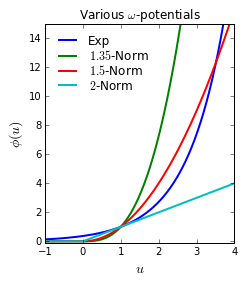

In [24]:
potentials = [ExponentialPotential(), pNormPotential(1.35), pNormPotential(1.5), pNormPotential(2)]
labels = ['Exp', '$1.35$-Norm', '$1.5$-Norm', '$2$-Norm']
filename = '/Users/balandat/Documents/Code/Continuous_No-Regret/NIPS2/figures/potentials_illustration.pdf'

u = np.linspace(-1, 4, 1000)
plt.figure(figsize=(3.5,4))
for vals,label in zip([pot.phi(u) for pot in potentials], labels):
    plt.plot(u, vals, label=label, linewidth=2)
plt.ylim((-0.1, 15))
plt.xlabel('$u$', fontsize=14)
plt.ylabel('$\phi(u)$', fontsize=14)
plt.legend(prop={'size':12}, frameon=False, loc='upper left', labelspacing=0.1)
plt.title('Various $\omega$-potentials')
plt.tight_layout()
plt.savefig(filename, bbox_inches='tight', dpi=300)

# Big Comparison on Convex Problem

In [47]:
filename = '/Users/balandat/Documents/Code/Continuous_No-Regret/NIPS2_datafiles/Convex_Quadratic_full.piggl'
with open(filename, 'rb') as f:
    results = pickle.load(f)
dict_results = {r.label : r for r in results}
print(list(dict_results.keys()))

filename = '/Users/balandat/Documents/Code/Continuous_No-Regret/NIPS2_datafiles/Convex_Quadratic_full3.piggl'
with open(filename, 'rb') as f:
    results3 = pickle.load(f)
dict_results3 = {r.label : r for r in results3}
print(list(dict_results3.keys()))

['OGD', 'EWOO', 'FTAL', 'pNormPot, $p={1.5}$', 'ONS', 'GP', 'ExpPot']
['OGD', 'EWOO', 'FTAL', 'pNormPot, $p={1.5}$', 'ONS', 'GP', 'ExpPot']


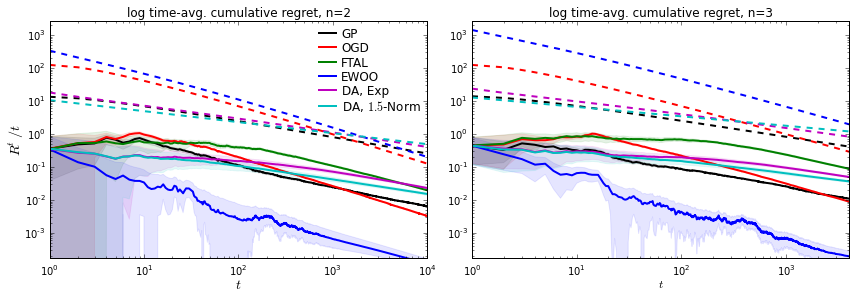

In [61]:
filename = '/Users/balandat/Documents/Code/Continuous_No-Regret/NIPS2/figures/Convex_Quadratic_full.pdf'
conv_keys = ['GP', 'OGD', 'FTAL', 'EWOO', 'ExpPot', 'pNormPot, $p={1.5}$']
conv_labels = ['GP', 'OGD', 'FTAL', 'EWOO', 'DA, Exp', 'DA, $1.5$-Norm']
colors = ['k', 'r', 'g', 'b', 'm', 'c']
f, axs = plt.subplots(1, 2, figsize=(12,4.25))
axs[0].set_title('log time-avg. cumulative regret, n=2')
axs[0].set_xlabel('$t$', fontsize=14, labelpad=0)
axs[0].set_ylabel('$R^t/t$', fontsize=14, labelpad=-2)
axs[1].set_title('log time-avg. cumulative regret, n=3')
axs[1].set_xlabel('$t$', fontsize=12, labelpad=0)
# axs[1].set_ylabel('$R^t/t$', fontsize=12)
for i,key in enumerate(conv_keys):
    rs = [dict_results[key], dict_results3[key]]
    for ax,r in zip(axs, rs):
        lltsavg = ax.plot(np.arange(1,r.problem.T+1), r.regs_norate['tsavg'][0], linewidth=2.0, 
                          color=colors[i], label=conv_labels[i], rasterized=True)
        ax.fill_between(np.arange(1,r.problem.T+1), r.regs_norate['tavg_perc_10'][0], 
                        r.regs_norate['tavg_perc_90'][0], color=colors[i], alpha=0.1, rasterized=True)
        if key != 'FTAL':
            ax.plot(np.arange(1,r.problem.T+1), r.regs_norate['tsavgbnd'][0], linestyle='--',
                    color=colors[i], linewidth=2, rasterized=True)
# make plots pretty and show legend
axs[0].set_yscale('log'), axs[0].set_xscale('log')
axs[0].set_ylim((1.75*1e-4,2.6*1e3))
axs[0].legend(prop={'size':12}, frameon=False, loc='upper right', labelspacing=0.1, 
              handletextpad=0.2, borderpad=0) 
axs[1].set_yscale('log'), axs[1].set_xscale('log')
axs[1].set_ylim((1.75*1e-4,2.6*1e3))
axs[1].set_xlim(1, 4e3)
plt.tight_layout()
plt.savefig(filename, bbox_inches='tight', dpi=300)

In [16]:
slopes, slopes3 = {}, {}
for key,r in dict_results.items():
    slopes[key] = np.array([list(r.estimate_loglog_slopes(3000)[0].values())[0],
                            list(r.estimate_loglog_slopes(3000)[1].values())[0]]).flatten()
for key,r in dict_results3.items():    
    slopes3[key] = np.array([list(r.estimate_loglog_slopes(2000)[0].values())[0],
                             list(r.estimate_loglog_slopes(2000)[1].values())[0]]).flatten()
diff = {key: (val[0]-val[1])/np.abs(val[1])*100 for key,val in slopes.items()}

# Thou shalt not covet

In [146]:
filename = '/Users/balandat/Documents/Code/Continuous_No-Regret/NIPS2_datafiles/greedyfail_Affine.piggl'
with open(filename, 'rb') as f:
    results = pickle.load(f)
dict_results = {r.label : r for r in results}
print(list(dict_results.keys()))

['pNormPot, $p={1.01}$', 'pNormPot, $p={1.001}$', 'pNormPot, $p={1.75}$', 'pNormPot, $p={1.05}$', 'Greedy', 'ExpPot']


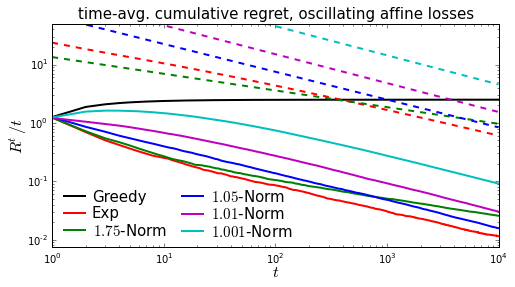

In [201]:
filename = '/Users/balandat/Documents/Code/Continuous_No-Regret/NIPS2/figures/greedy_fail.pdf'
# select only "nice" thigs to plot (here those are where the regret is not tooo low)
greedy_keys = ['Greedy', 'ExpPot', 'pNormPot, $p={1.75}$', 'pNormPot, $p={1.05}$', 
               'pNormPot, $p={1.01}$', 'pNormPot, $p={1.001}$']
# greedy_labels = ['Greedy', 'Exp', 'pNorm, $p=1.75$', 'pNorm, $p=1.05$', 'pNorm, $p=1.01$', 'pNorm, $p=1.001$']
greedy_labels = ['Greedy', 'Exp', '$1.75$-Norm', '$1.05$-Norm', '$1.01$-Norm', '$1.001$-Norm']
colors = ['k', 'r', 'g', 'b', 'm', 'c']
f = plt.figure(figsize=(8,4))
plt.title('time-avg. cumulative regret, oscillating affine losses', fontsize=15)
plt.xlabel('$t$', fontsize=16, labelpad=-1)
plt.ylabel('$R^t/t$', fontsize=16, labelpad=-2)
for i,key in enumerate(greedy_keys):
    r = dict_results[key]
    lltsavg = plt.plot(np.arange(1,r.problem.T+1), r.regs_norate['tsavg'][0], linewidth=2.0, 
                       color=colors[i], label=greedy_labels[i], rasterized=True)
#     plt.fill_between(np.arange(1,r.problem.T+1), r.regs_norate['tavg_perc_10'][0], 
#                      r.regs_norate['tavg_perc_90'][0], color=colors[i], alpha=0.1, rasterized=True)
    try:
        plt.plot(np.arange(1,r.problem.T+1), r.regs_norate['tsavgbnd'][0], linestyle='--',
                 color=colors[i], linewidth=2, rasterized=True)
    except IndexError: pass
# make plots pretty and show legend
plt.yscale('log'), plt.xscale('log')
plt.ylim((0.0075, 50))
plt.legend(prop={'size':15}, frameon=False, loc='lower left', labelspacing=0.1, ncol=2, 
              columnspacing=0.75, handletextpad=0.2, borderpad=0) 
plt.savefig(filename, bbox_inches='tight', dpi=300)

In [107]:
slopes = {key: [list(val.slopes.values())[0], list(val.slopes_bnd.values())[0]] for key,val in dict_results.items()}

### KL Divergence

In [148]:
KLkeys = ['pNormPot, $p={1.001}$', 'pNormPot, $p={1.01}$', 'pNormPot, $p={1.05}$', 'pNormPot, $p={1.75}$', 'ExpPot']
KLs = {key: np.array(dict_results[key].KL) for key in KLkeys}

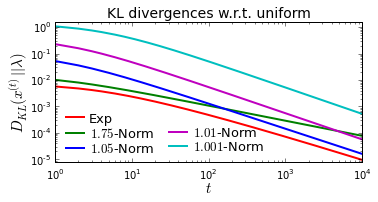

In [204]:
filename = '/Users/balandat/Documents/Code/Continuous_No-Regret/NIPS2/figures/greedy_fail_KL.pdf'
fig, ax = plt.subplots(1,1,figsize=(5.5,2.5))
lines,labels = [], []
for i,key in enumerate(greedy_keys):
    r = dict_results[key]
    if key not in ['Greedy']:
        rel2exp = np.array(r.KL)[1:]    #  *np.arange(1,len(val))#/np.array(dict_results['ExpPot'].KL)[1:]
        ax.plot(1+np.arange(len(val)-1), rel2exp, color=colors[i], linewidth=2, label=greedy_labels[i])
(lines,labels) = plt.gca().get_legend_handles_labels()
lines.insert(3, plt.Line2D([1,1], [1,1], linestyle='none'))
labels.insert(3, '')
plt.yscale('log'), plt.xscale('log')
ax.legend(lines, labels, prop={'size':13}, frameon=False, loc='lower left', labelspacing=0.1, ncol=2, 
              columnspacing=0.75, handletextpad=0.2, borderpad=0) 
ax.set_xlabel('$t$', fontsize=15, labelpad=-1)
ax.set_ylim((0.8e-5,1.5))
ax.set_ylabel('$D_{KL}(x^{(t)}||\lambda)$', fontsize=15, labelpad=0) #/D_{KL}(x_{Exp}^{(t)}||\lambda)$'
ax.set_title('KL divergences w.r.t. uniform', fontsize=14)
plt.savefig(filename, bbox_inches='tight', dpi=300)

# Comparison for different Normbounds (polynomial)

In [209]:
filename = '/Users/balandat/Documents/Code/Continuous_No-Regret/NIPS2_datafiles/NormBounds_Polynomial.piggl'
with open(filename, 'rb') as f:
    results = pickle.load(f)
dict_results = {r.label : r for r in results}
print(list(dict_results.keys()))

filename = '/Users/balandat/Documents/Code/Continuous_No-Regret/NIPS2_datafiles/NormBounds_Polynomial_3.piggl'
with open(filename, 'rb') as f:
    results3 = pickle.load(f)
dict_results3 = {r.label : r for r in results3}
print(list(dict_results3.keys()))

['norm_ExpPot', 'norm_pNormPot, $p={1.05}$', 'norm_pNormPot, $p={2}$', 'norm_pNormPot, $p={1.5}$']
['norm_ExpPot', 'norm_pNormPot, $p={1.5}$', 'norm_pNormPot, $p={2}$', 'norm_pNormPot, $p={1.05}$']


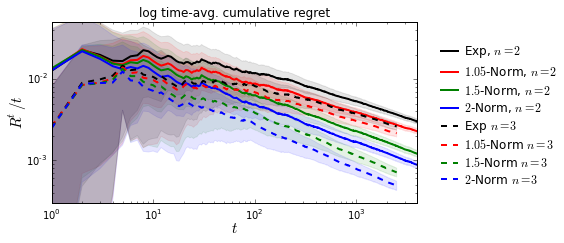

In [255]:
filename = '/Users/balandat/Documents/Code/Continuous_No-Regret/NIPS2/figures/NormBounds_Polynomial.pdf'
norm_keys = ['norm_ExpPot', 'norm_pNormPot, $p={1.05}$', 'norm_pNormPot, $p={1.5}$', 'norm_pNormPot, $p={2}$']
norm_labels = ['Exp', '$1.05$-Norm', '$1.5$-Norm', '$2$-Norm']
colors = ['k', 'r', 'g', 'b', 'm', 'c']
f, ax = plt.subplots(1, 1, figsize=(6,3.5))
ax.set_title('log time-avg. cumulative regret')
ax.set_xlabel('$t$', fontsize=15, labelpad=-1)
ax.set_ylabel('$R^t/t$', fontsize=15, labelpad=-3)
ax.set_title('log time-avg. cumulative regret')
for i,key in enumerate(norm_keys):
    r, r3 = dict_results[key], dict_results3[key]
    lltsavg = ax.plot(np.arange(1,r.problem.T+1), r.regs_norate['tsavg'][0], linewidth=2.0, linestyle='-',
                      color=colors[i], label=norm_labels[i]+', $n=2$', rasterized=True)
    ax.fill_between(np.arange(1,r.problem.T+1), r.regs_norate['tavg_perc_10'][0], 
                    r.regs_norate['tavg_perc_90'][0], color=colors[i], alpha=0.1, rasterized=True)
#     ax.plot(np.arange(1,r.problem.T+1), r.regs_norate['tsavgbnd'][0], linestyle='-.',
#             color=colors[i], linewidth=2, rasterized=True)
for i,key in enumerate(norm_keys):
    r, r3 = dict_results[key], dict_results3[key]   
    lltsavg3 = ax.plot(np.arange(1,r3.problem.T+1), r3.regs_norate['tsavg'][0], linewidth=2.0, linestyle='--',
                       color=colors[i], label=norm_labels[i]+' $n=3$', rasterized=True)
    ax.fill_between(np.arange(1,r3.problem.T+1), r3.regs_norate['tavg_perc_10'][0], 
                    r3.regs_norate['tavg_perc_90'][0], color=colors[i], alpha=0.1, rasterized=True)
#     ax.plot(np.arange(1,r3.problem.T+1), r3.regs_norate['tsavgbnd'][0], linestyle=':',
#             color=colors[i], linewidth=2, rasterized=True)
# make plots pretty and show legend
ax.set_yscale('log'), ax.set_xscale('log')
ax.set_ylim((0.3*1e-3,0.5e-1))#0.2*1e2))
ax.set_xlim(1, 4e3)
plt.tight_layout()
plt.legend(prop={'size':12}, frameon=False, loc='upper right', labelspacing=0.3, 
           handletextpad=0.25, borderpad=0, bbox_to_anchor=(1.4,0.91))
plt.savefig(filename, bbox_inches='tight', dpi=300)

In [238]:
slopes = {key: np.array([list(val.slopes.values())[0], list(val.slopes_bnd.values())[0]]).flatten() 
          for key,val in dict_results.items()}
slopes3 = {key: np.array([list(val.slopes.values())[0], list(val.slopes_bnd.values())[0]]).flatten() 
          for key,val in dict_results3.items()}

In [239]:
slopes, slopes3

({'norm_ExpPot': array([-0.44884274, -0.44625237]),
  'norm_pNormPot, $p={1.05}$': array([-0.4251074 , -0.47608405]),
  'norm_pNormPot, $p={1.5}$': array([-0.48829415, -0.33325884]),
  'norm_pNormPot, $p={2}$': array([-0.47651212, -0.24994413])},
 {'norm_ExpPot': array([-0.3897769 , -0.44489012]),
  'norm_pNormPot, $p={1.05}$': array([-0.38364969, -0.46488881]),
  'norm_pNormPot, $p={1.5}$': array([-0.52033923, -0.28557455]),
  'norm_pNormPot, $p={2}$': array([-0.52011064, -0.19990219])})

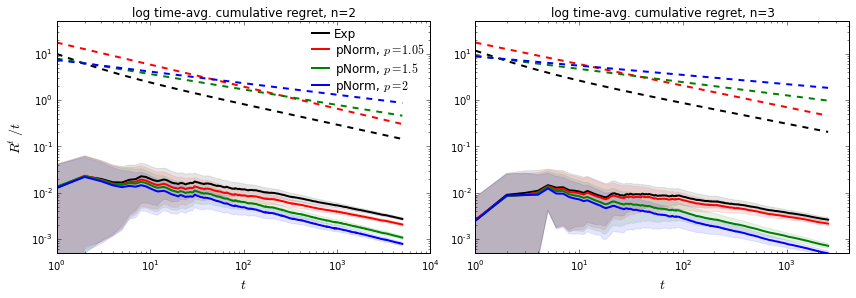

In [208]:
filename = '/Users/balandat/Documents/Code/Continuous_No-Regret/NIPS2/figures/NormBounds_Polynomial.pdf'
norm_keys = ['norm_ExpPot', 'norm_pNormPot, $p={1.05}$', 'norm_pNormPot, $p={1.5}$', 'norm_pNormPot, $p={2}$']
norm_labels = ['Exp', 'pNorm, $p=1.05$', 'pNorm, $p=1.5$', 'pNorm, $p=2$']
colors = ['k', 'r', 'g', 'b', 'm', 'c']
f, axs = plt.subplots(1, 2, figsize=(12,4.25))
axs[0].set_title('log time-avg. cumulative regret, n=2')
axs[0].set_xlabel('$t$', fontsize=14)
axs[0].set_ylabel('$R^t/t$', fontsize=14)
axs[1].set_title('log time-avg. cumulative regret, n=3')
axs[1].set_xlabel('$t$', fontsize=14)
for i,key in enumerate(norm_keys):
    rs = [dict_results[key], dict_results3[key]]
    for ax,r in zip(axs, rs):
        lltsavg = ax.plot(np.arange(1,r.problem.T+1), r.regs_norate['tsavg'][0], linewidth=2.0, 
                          color=colors[i], label=norm_labels[i], rasterized=True)
        ax.fill_between(np.arange(1,r.problem.T+1), r.regs_norate['tavg_perc_10'][0], 
                        r.regs_norate['tavg_perc_90'][0], color=colors[i], alpha=0.1, rasterized=True)
        if key != 'FTAL':
            ax.plot(np.arange(1,r.problem.T+1), r.regs_norate['tsavgbnd'][0], linestyle='--',
                    color=colors[i], linewidth=2, rasterized=True)
# make plots pretty and show legend
axs[0].set_yscale('log'), axs[0].set_xscale('log')
axs[0].set_ylim((0.5*1e-3,0.5*1e2))
axs[0].legend(prop={'size':12}, frameon=False, loc='upper right', labelspacing=0.1, handletextpad=0.2, borderpad=0)
#               ncol=2, columnspacing=0.75,  
axs[1].set_yscale('log'), axs[1].set_xscale('log')
axs[1].set_ylim((0.5*1e-3,0.5*1e2))
axs[1].set_xlim(1, 4e3)
plt.tight_layout()
# plt.savefig(filename, bbox_inches='tight', dpi=300)

# Effect of the uniform fatness parameter v

In [2]:
filename = '/Users/balandat/Documents/Code/Continuous_No-Regret/NIPS2_datafiles/effect_of_v.piggl'
with open(filename, 'rb') as f:
    results = pickle.load(f)
dict_results = {r.label : r for r in results}
print(list(dict_results.keys()))

['v=0.50, pNormPot, $p={1.75}$', 'v=1.00, pNormPot, $p={1.05}$', 'v=0.25, pNormPot, $p={1.05}$', 'v=0.10, pNormPot, $p={1.75}$', 'v=0.25, pNormPot, $p={1.75}$', 'v=0.10, pNormPot, $p={1.05}$', 'v=1.00, pNormPot, $p={1.75}$', 'v=0.05, pNormPot, $p={1.05}$', 'v=0.05, pNormPot, $p={1.75}$', 'v=0.50, pNormPot, $p={1.05}$']


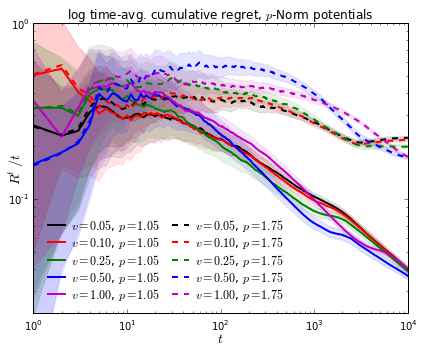

In [3]:
filename = '/Users/balandat/Documents/Code/Continuous_No-Regret/NIPS2/figures/effect_of_v.pdf'
vs = [0.05, 0.10, 0.25, 0.50, 1.00]
pNkeys105 = ['v={0:.2f}, pNormPot, $p={{1.05}}$'.format(v) for v in vs]
pNlabels105 = ['$v={0:.2f}$, $p=1.05$'.format(v) for v in vs]
pNkeys175 = ['v={0:.2f}, pNormPot, $p={{1.75}}$'.format(v) for v in vs]
pNlabels175 = ['$v={0:.2f}$, $p=1.75$'.format(v) for v in vs]

colors = ['k', 'r', 'g', 'b', 'm', 'c']
f, ax = plt.subplots(1, figsize=(6,5))
ax.set_xlabel('$t$', fontsize=14, labelpad=-1)
ax.set_ylabel('$R^t/t$', fontsize=14, labelpad=-18)
ax.set_title('log time-avg. cumulative regret, $p$-Norm potentials')
for i,key in enumerate(pNkeys105):
    r = dict_results[key]
    lltsavg = ax.plot(np.arange(1,r.problem.T+1), r.regs_norate['tsavg'][0], linewidth=2.0, 
                      color=colors[i], label=pNlabels105[i], rasterized=True)
    ax.fill_between(np.arange(1,r.problem.T+1), r.regs_norate['tavg_perc_10'][0], 
                    r.regs_norate['tavg_perc_90'][0], color=colors[i], alpha=0.1, rasterized=True)
for i,key in enumerate(pNkeys175):
    r = dict_results[key]
    lltsavg = ax.plot(np.arange(1,r.problem.T+1), r.regs_norate['tsavg'][0], linewidth=2.0, linestyle='--',
                      color=colors[i], label=pNlabels175[i], rasterized=True)
    ax.fill_between(np.arange(1,r.problem.T+1), r.regs_norate['tavg_perc_10'][0], 
                    r.regs_norate['tavg_perc_90'][0], color=colors[i], alpha=0.1, rasterized=True)
# make plots pretty and show legend
ax.set_yscale('log'), ax.set_xscale('log')
ax.set_ylim((2.25e-2, 1))
ax.legend(prop={'size':12}, frameon=False, loc='lower left', labelspacing=0.1, 
          ncol=2,  columnspacing=0.75, handletextpad=0.2) 
plt.tight_layout()
# plt.savefig(filename, bbox_inches='tight', dpi=300)

### Plot snapshots

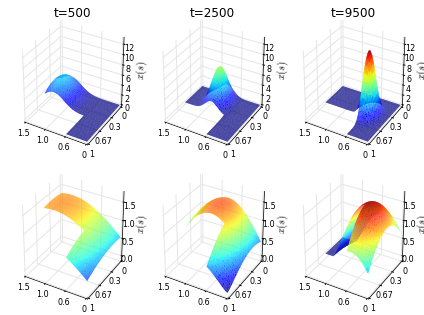

In [92]:
filename = '/Users/balandat/Documents/Code/Continuous_No-Regret/NIPS2/figures/effect_of_v_snapshots.pdf'
times = [500, 2500, 9500]

fig = plt.figure(figsize=(6,4.5))
res105 = dict_results['v=0.50, pNormPot, $p={1.05}$']
res175 = dict_results['v=0.50, pNormPot, $p={1.75}$']
# idk why the FUCK this does not work just using np arrays!?
zmax = [np.max([np.max([np.max(df) for df in dflat]) for dflat in res.pltdata]) for res in [res105,res175]]
zmin = [np.min([np.min([np.min(df) for df in dflat]) for dflat in res.pltdata]) for res in [res105,res175]]
pltpoints = res105.problem.pltpoints

bbox = res105.problem.domain.bbox()
for i,res in enumerate([res105, res175]):
    for j,time in enumerate(times):
        ax = fig.add_subplot(2, len(times), len(times)*i+j+1, projection='3d')
        for points,dat in zip(pltpoints, res.pltdata[time]):
            ax.plot_trisurf(points[:,0], points[:,1], dat, cmap=plt.get_cmap('jet'), 
                           linewidth=0, vmin=zmin[i], vmax=zmax[i])
        # Setting the axes properties
        ax.set_xlim3d(bbox.bounds[0])
        #ax.set_xlabel('$s_1$')
        ax.set_xticks([0, 0.5, 1, 1.5])
        ax.set_xticklabels(['0', '0.6', '1.0', '1.5'])
        ax.tick_params(labelsize=8)
        ax.set_ylim3d(bbox.bounds[1])
        #ax.set_ylabel('$s_2$')
        ax.set_yticks([0, 0.3, 0.67, 1])
        ax.set_yticklabels(['0', '0.3', '0.67', '1'])
        ax.yaxis._axinfo['label']['space_factor'] = 2.5
        ax.set_zlim3d([-0.1, zmax[i]])
        ax.set_zlabel('$x(s)$')
        ax.zaxis._axinfo['label']['space_factor'] = 2.5
        if i==0:
            ax.set_title('t={}'.format(time))
        ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
        ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
        ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
        ax.view_init(elev=30, azim=120)
plt.tight_layout()
plt.savefig(filename, bbox_inches='tight', dpi=300)

### Create animations

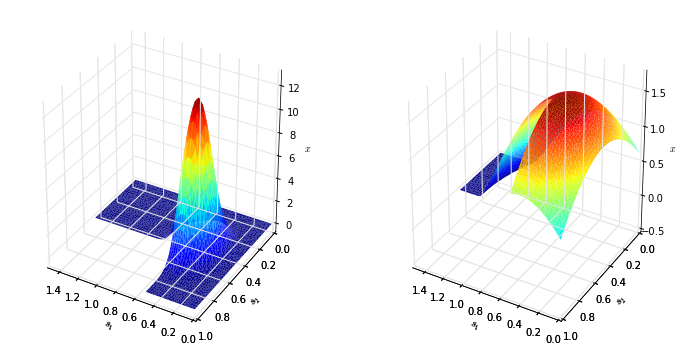

In [5]:
filename = '/Users/balandat/Documents/Code/Continuous_No-Regret/NIPS2_datafiles/effect_of_v.mp4'
save_animations_NIPS2(dict_results['v=0.50, pNormPot, $p={1.05}$'], dict_results['v=0.50, pNormPot, $p={1.75}$'],
                      length=10, filename=filename, elev=30, azim=120, figsize=(12,6))

In [266]:
save_animations_NIPS2

<function ContNoRegret.animate.save_animations_NIPS2>